In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import numpy as np

In [2]:
#provider0 = IBMQ.load_account()
#provider1 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#backends = provider0.backends()
#backend = provider0.get_backend('ibmq_16_melbourne')

#print("The backend is " + backend.name())

In [3]:
simulator = Aer.get_backend('qasm_simulator')
pi = np.pi

In [16]:
q = QuantumRegister(6)
c = ClassicalRegister(6)
qc = QuantumCircuit(q, c)

# |0>+|4>+|8>+|12>+...
#qc.h(q[0])
#qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.h(q[4])
qc.h(q[5])


#qc.measure(q[0], c[0])
#qc.measure(q[1], c[1])
#qc.measure(q[2], c[2])
#qc.measure(q[3], c[3])
#qc.measure(q[4], c[4])
#qc.measure(q[5], c[5])


# IBMQ16

In [5]:
#job_exp = execute(qc, backend=backend, shots=8192)
#counts = job_exp.result().get_counts(qc)

In [6]:
#print(counts)

In [7]:
#plot_histogram(counts)

# Simulator

In [8]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [9]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'010000': 525, '011000': 491, '101100': 461, '000100': 514, '010100': 495, '000000': 510, '110100': 518, '001000': 525, '011100': 530, '100000': 519, '111100': 495, '100100': 565, '111000': 528, '001100': 499, '101000': 514, '110000': 503}


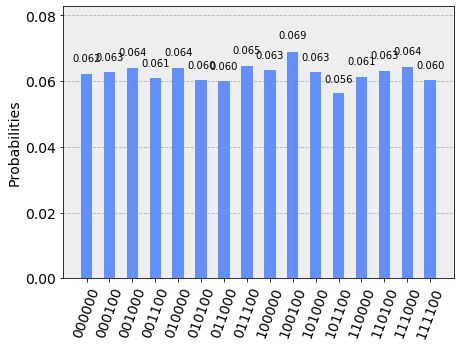

In [10]:
plot_histogram(counts_sim)

In [17]:
#biggest qubit stand on top

qc.h(q[5])

qc.cu1(pi/2,q[4] ,q[5])
qc.h(q[4])

qc.cu1(pi/4,q[3] ,q[5])
qc.cu1(pi/2,q[3] ,q[4])
qc.h(q[3])

qc.cu1(pi/8,q[2] ,q[5])
qc.cu1(pi/4,q[2] ,q[4])
qc.cu1(pi/2,q[2] ,q[3])
qc.h(q[2])

qc.cu1(pi/16,q[1] ,q[5])
qc.cu1(pi/8,q[1] ,q[4])
qc.cu1(pi/4,q[1] ,q[3])
qc.cu1(pi/2,q[1] ,q[2])
qc.h(q[1])

qc.cu1(pi/32,q[0] ,q[5])
qc.cu1(pi/16,q[0] ,q[4])
qc.cu1(pi/8,q[0] ,q[3])
qc.cu1(pi/4,q[0] ,q[2])
qc.cu1(pi/2,q[0] ,q[1])
qc.h(q[0])

qc.swap(q[5] ,q[0])
qc.swap(q[4] ,q[1])
qc.swap(q[3] ,q[2])

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])
qc.measure(q[4], c[4])
qc.measure(q[5], c[5])

In [18]:
job_sim2 = execute(qc, backend=simulator, shots=8192)
counts_sim2 = job_sim2.result().get_counts(qc)

In [19]:
print("\nTotal count for simulator:",counts_sim2)


Total count for simulator: {'100000': 2048, '010000': 2103, '110000': 2057, '000000': 1984}


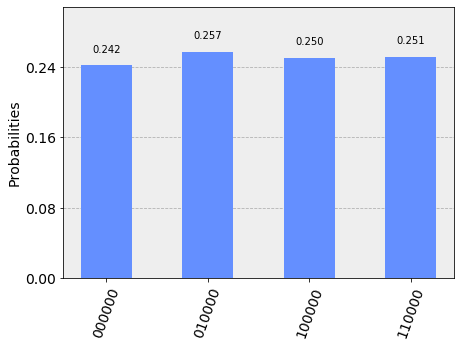

In [20]:
plot_histogram(counts_sim2)

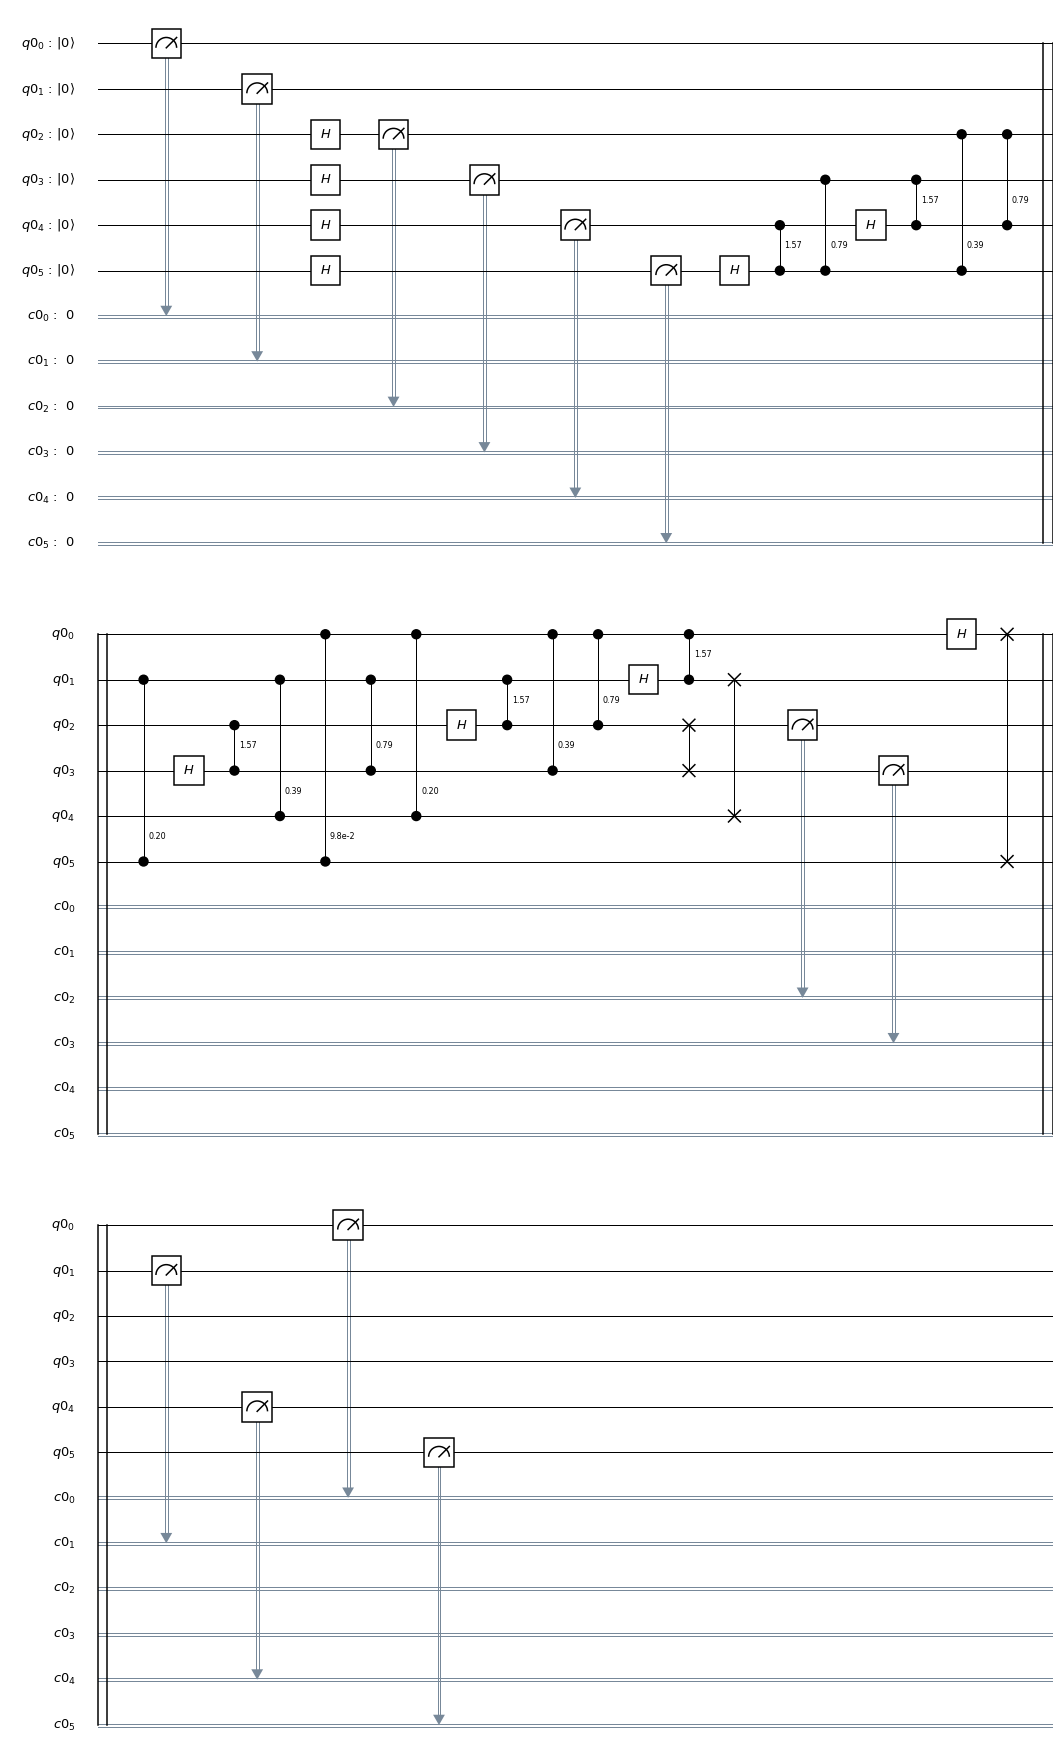

In [15]:
qc.draw(output='mpl')